In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot as plt
import seaborn

In [3]:
HOME_PATH = '' #home path of the project
FILENAME = 'C_Obesity_Data_Real.csv'

## 1. Load the dataset

In [4]:
dataset = pd.read_csv(HOME_PATH + FILENAME)
dataset['Age'] = np.round(dataset['Age']).astype('int64')
dataset['Height'] = np.round(dataset['Height'],2)
dataset['Weight'] = np.round(dataset['Weight'],2)
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 2. Analyze data

In [5]:
categorical_cols = (dataset.select_dtypes(include=['object'])).columns.tolist()
categorical_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'Obesity_level']

In [6]:
#dimensions of the dataset
dataset.shape

(2111, 17)

In [7]:
#data types of each attribute
dataset.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
Obesity_level                      object
dtype: object

In [8]:
dataset['FCVC'].values

array([2., 3., 2., ..., 3., 3., 3.])

In [9]:
#peak of the data
dataset.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [10]:
#summarize the distribution of each attribute
set_option('precision', 2)
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.32,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.36,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,20.00,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,23.00,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


## 3. Data visualization

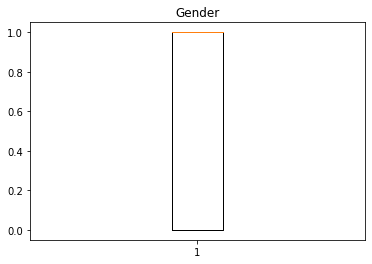

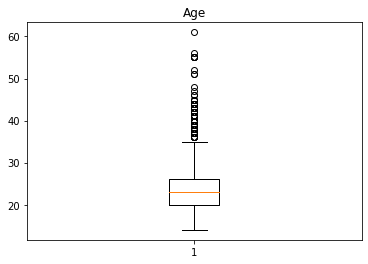

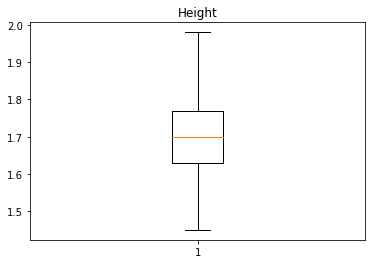

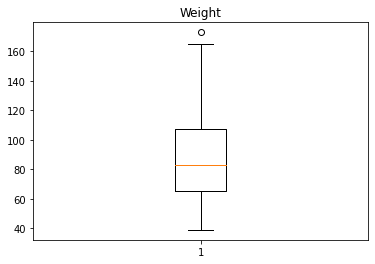

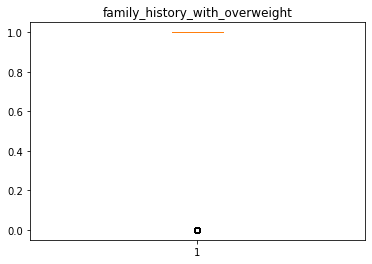

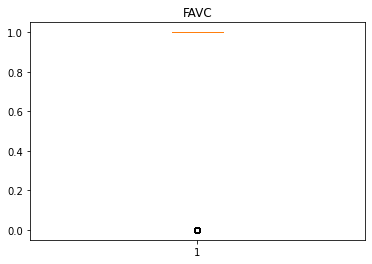

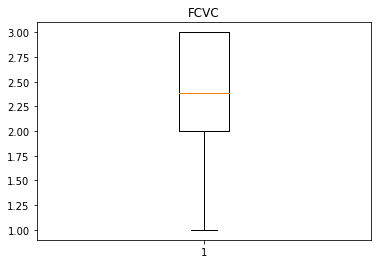

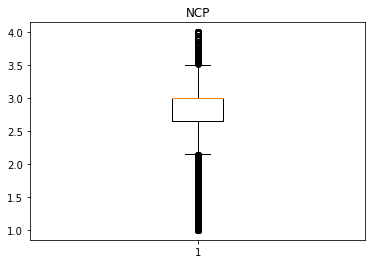

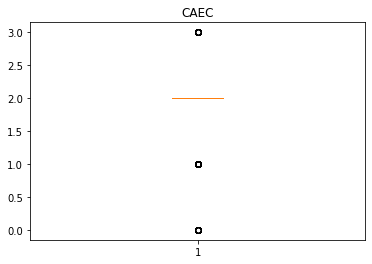

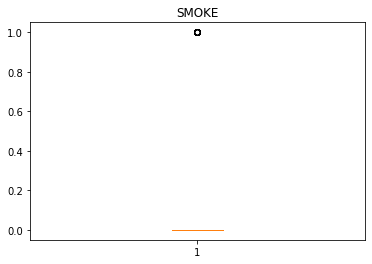

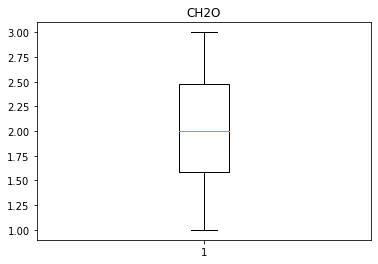

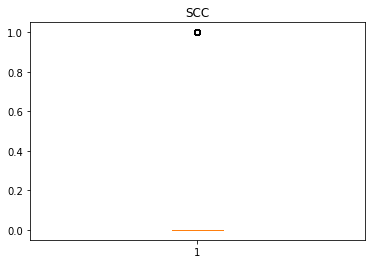

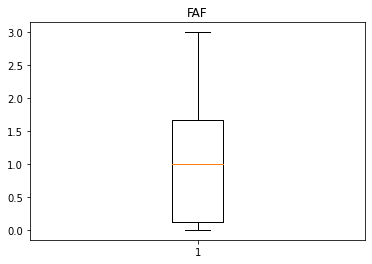

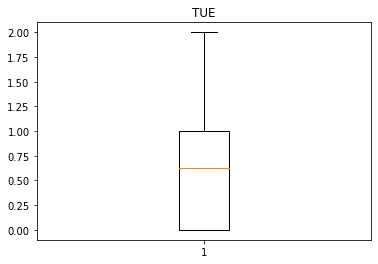

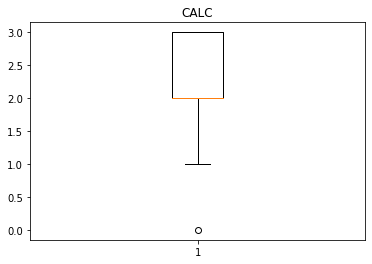

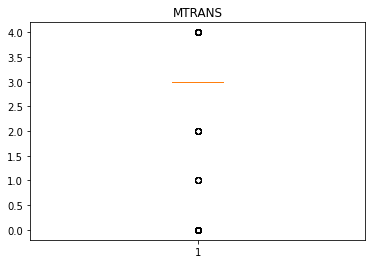

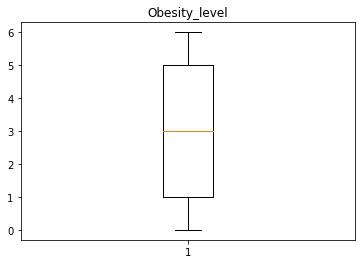

In [11]:
for col in dataset.columns :
    # Multiple box plots on one Axes
    data = dataset[col]
    if col in categorical_cols :
        data = data.astype("category").cat.codes
    fig, ax = plt.subplots()
    ax.boxplot(data)
    ax.set_title(col)

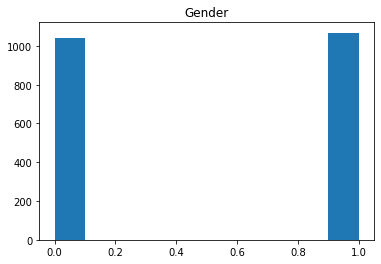

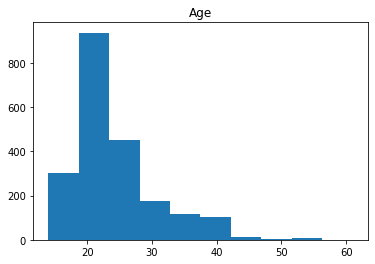

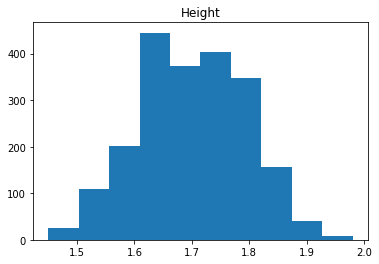

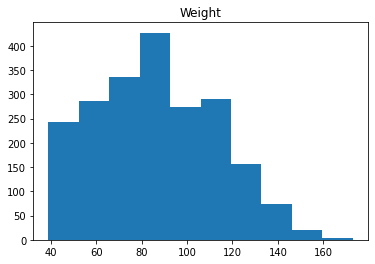

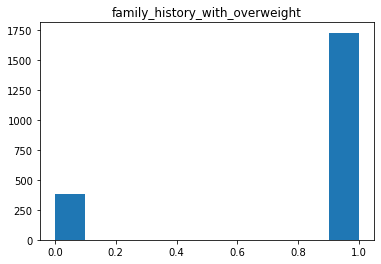

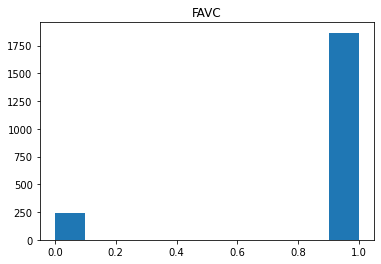

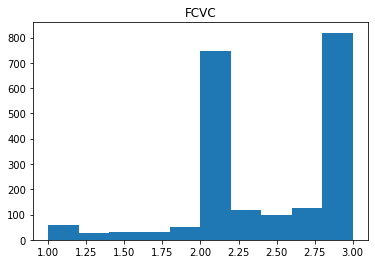

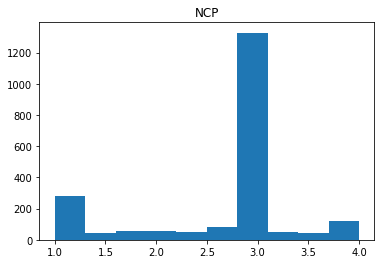

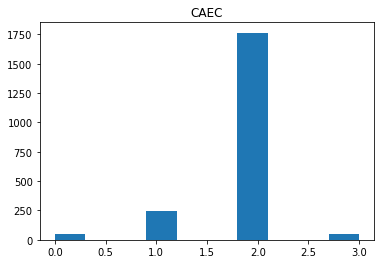

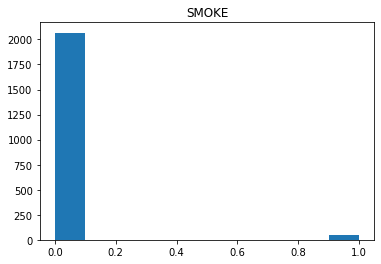

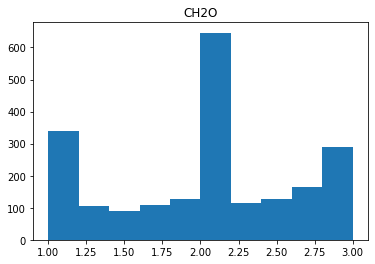

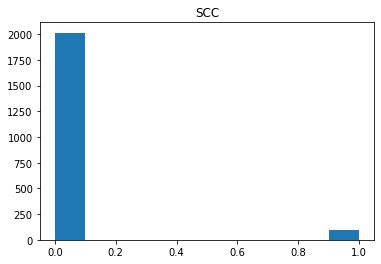

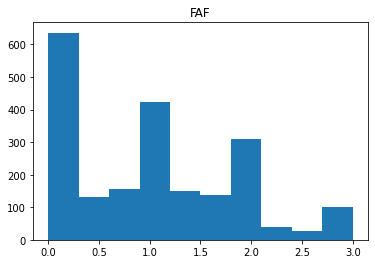

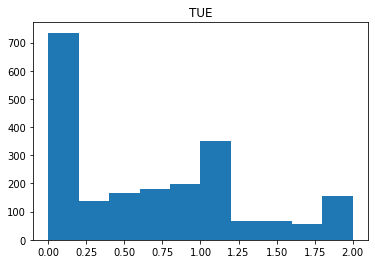

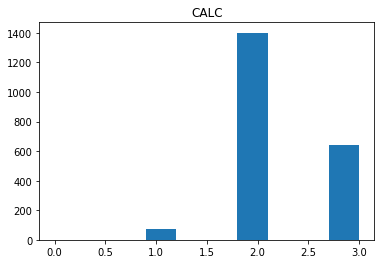

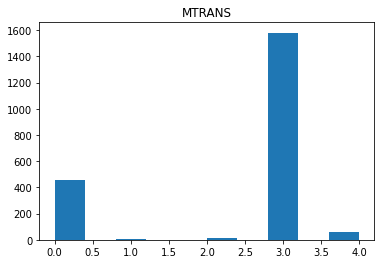

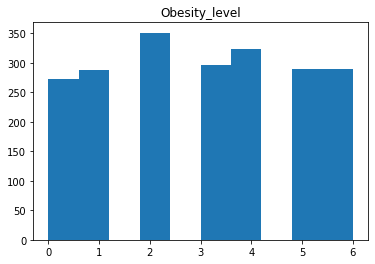

In [12]:
for col in dataset.columns :
    # Multiple box plots on one Axes
    data = dataset[col]
    if col in categorical_cols :
        data = data.astype("category").cat.codes
    fig, ax = plt.subplots()
    ax.hist(data, density=False, histtype='bar')
    ax.set_title(col)

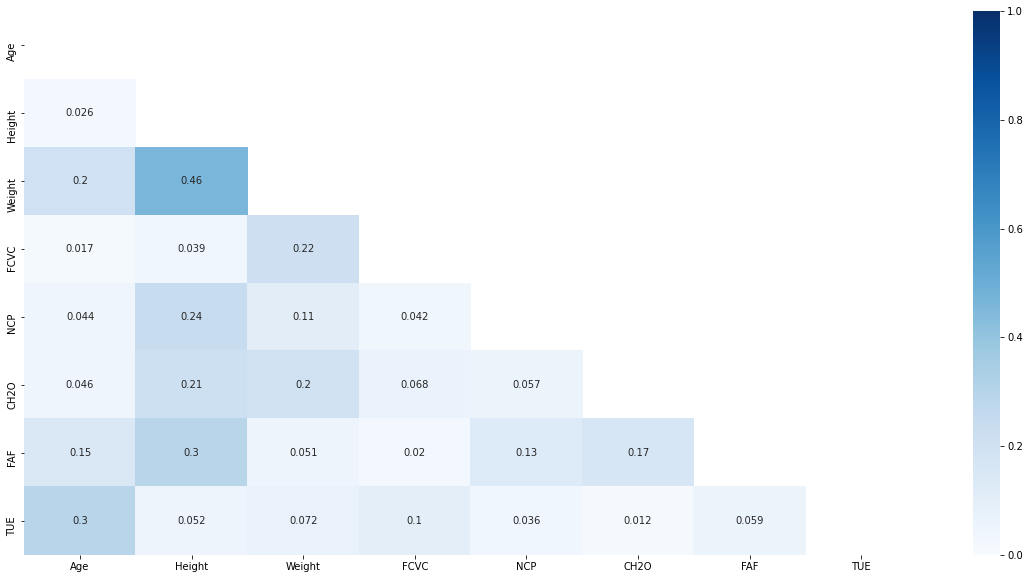

In [13]:
#Correlation matrix
set_option('precision', 2)
pyplot.figure(figsize=(20,10))
cors = abs(dataset.corr(method='pearson'))
seaborn.heatmap(cors, mask=np.triu(np.ones_like(cors, dtype=bool)), vmin=0, vmax=1, cmap='Blues', annot=True)
pyplot.show()

## 4. Edit data

In [14]:
for col in dataset.columns :
    if not dataset[col].isnull().values.any() :
        print(col, ':', 'NO NaN values')
    else :
        print(col, ':', 'NaN values finded')
        print('Number of NaN values: ', dataset[col].isnull().sum())

Gender : NO NaN values
Age : NO NaN values
Height : NO NaN values
Weight : NO NaN values
family_history_with_overweight : NO NaN values
FAVC : NO NaN values
FCVC : NO NaN values
NCP : NO NaN values
CAEC : NO NaN values
SMOKE : NO NaN values
CH2O : NO NaN values
SCC : NO NaN values
FAF : NO NaN values
TUE : NO NaN values
CALC : NO NaN values
MTRANS : NO NaN values
Obesity_level : NO NaN values


In [15]:
#quick look at the breakdown of class values
for col in categorical_cols :
    dataset[col] = dataset[col].astype('category')
    print('###########################')
    print(dataset.groupby(col).size())

###########################
Gender
Female    1043
Male      1068
dtype: int64
###########################
family_history_with_overweight
no      385
yes    1726
dtype: int64
###########################
FAVC
no      245
yes    1866
dtype: int64
###########################
CAEC
Always          53
Frequently     242
Sometimes     1765
no              51
dtype: int64
###########################
SMOKE
no     2067
yes      44
dtype: int64
###########################
SCC
no     2015
yes      96
dtype: int64
###########################
CALC
Always           1
Frequently      70
Sometimes     1401
no             639
dtype: int64
###########################
MTRANS
Automobile                457
Bike                        7
Motorbike                  11
Public_Transportation    1580
Walking                    56
dtype: int64
###########################
Obesity_level
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       3

## 5. Data split (train and test)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Split data indixes in train and test
idx_train, idx_test = train_test_split(dataset.index.tolist(), train_size=0.8, random_state=42, shuffle=True)
print('Train data length: ', len(idx_train))
print('Test data length: ', len(idx_test))
print('Total data length: ', len(idx_train) + len(idx_test))

Train data length:  1688
Test data length:  423
Total data length:  2111


In [18]:
#Select train data and save locally
diabetes_train_data = dataset.loc[idx_train]
diabetes_train_data.to_csv(HOME_PATH + 'TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv', index=False)
#Select test data and save locally
diabetes_test_data = dataset.loc[idx_test]
diabetes_test_data.to_csv(HOME_PATH + 'TEST DATASETS/A_Diabetes_Data_Real_Test.csv', index=False)
print('Train data size: ', diabetes_train_data.shape)
print('Test data length: ', diabetes_test_data.shape)

Train data size:  (1688, 17)
Test data length:  (423, 17)
